### NO2 Data

In [260]:
import pandas as pd
data1 = pd.read_csv('daily_42602_2020.csv')
data2 = pd.read_csv('daily_42602_2021.csv')
data3 = pd.read_csv('daily_42602_2022.csv')


x = pd.concat([data1, data2], axis=0)

d_p= pd.concat([x, data3], axis=0)

d_p=d_p[['Date Local','State Name','County Name','Arithmetic Mean']]

# Convert 'Date Local' to datetime format
d_p['Date Local'] = pd.to_datetime(d_p['Date Local'])

#Tking average of values for each county
d_p = d_p.groupby(['Date Local', 'State Name', 'County Name'])['Arithmetic Mean'].mean().reset_index()

# Rename the aggregated column for clarity if needed
d_p.rename(columns={'Arithmetic Mean': 'NO2'}, inplace=True)
d_p


C:\Users\habib\AppData\Local\Temp\ipykernel_57160\3195241858.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('daily_42602_2020.csv')
C:\Users\habib\AppData\Local\Temp\ipykernel_57160\3195241858.py:3: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('daily_42602_2021.csv')
C:\Users\habib\AppData\Local\Temp\ipykernel_57160\3195241858.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv('daily_42602_2022.csv')


,Date Local,State Name,County Name,NO2
0,2020-01-01,Alabama,Jefferson,16.373918
1,2020-01-01,Arizona,Maricopa,16.660833
2,2020-01-01,Arizona,Pima,11.206250
3,2020-01-01,Arkansas,Crittenden,9.175000
4,2020-01-01,Arkansas,Pulaski,12.637500
...,...,...,...,...
269581,2022-12-31,Wyoming,Lincoln,4.191304
269582,2022-12-31,Wyoming,Natrona,3.912500
269583,2022-12-31,Wyoming,Sublette,1.912500
269584,2022-12-31,Wyoming,Sweetwater,1.262682


### Preparing Mobility Data

In [261]:
import pandas as pd
d1 = pd.read_csv('2020_US_Region_Mobility_Report.csv')
d2 = pd.read_csv('2021_US_Region_Mobility_Report.csv')
d3 = pd.read_csv('2022_US_Region_Mobility_Report.csv')

d4= pd.concat([d1, d2], axis=0)

d5= pd.concat([d4, d3], axis=0)

d_m=d5[['sub_region_1','sub_region_2','date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',	'parks_percent_change_from_baseline',	'transit_stations_percent_change_from_baseline' ,	'workplaces_percent_change_from_baseline',	'residential_percent_change_from_baseline' ]]



In [262]:
d_m

,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
1,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
2,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0
3,NaN,NaN,2020-02-18,0.0,-1.0,6.0,1.0,0.0,1.0
4,NaN,NaN,2020-02-19,2.0,0.0,8.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
747964,Wyoming,Weston County,2022-10-10,NaN,NaN,NaN,NaN,-26.0,NaN
747965,Wyoming,Weston County,2022-10-11,NaN,NaN,NaN,NaN,-20.0,NaN
747966,Wyoming,Weston County,2022-10-12,NaN,NaN,NaN,NaN,-17.0,NaN
747967,Wyoming,Weston County,2022-10-13,NaN,NaN,NaN,NaN,-15.0,NaN


### Imputing Missing Values:

In [263]:
d_m['retail_and_recreation_percent_change_from_baseline'] = d_m['retail_and_recreation_percent_change_from_baseline'].fillna(d_m['retail_and_recreation_percent_change_from_baseline'].mean())
d_m['grocery_and_pharmacy_percent_change_from_baseline'] = d_m['grocery_and_pharmacy_percent_change_from_baseline'].fillna(d_m['grocery_and_pharmacy_percent_change_from_baseline'].mean())
d_m['parks_percent_change_from_baseline'] = d_m['parks_percent_change_from_baseline'].fillna(d_m['parks_percent_change_from_baseline'].mean())
d_m['transit_stations_percent_change_from_baseline'] = d_m['transit_stations_percent_change_from_baseline'].fillna(d_m['transit_stations_percent_change_from_baseline'].mean())
d_m['workplaces_percent_change_from_baseline'] = d_m['workplaces_percent_change_from_baseline'].fillna(d_m['workplaces_percent_change_from_baseline'].mean())
d_m['residential_percent_change_from_baseline'] = d_m['residential_percent_change_from_baseline'].fillna(d_m['residential_percent_change_from_baseline'].mean())
d_m

C:\Users\habib\AppData\Local\Temp\ipykernel_57160\2942060555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_m['retail_and_recreation_percent_change_from_baseline'] = d_m['retail_and_recreation_percent_change_from_baseline'].fillna(d_m['retail_and_recreation_percent_change_from_baseline'].mean())
C:\Users\habib\AppData\Local\Temp\ipykernel_57160\2942060555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_m['grocery_and_pharmacy_percent_change_from_baseline'] = d_m['grocery_and_pharmacy_percent_ch

In [264]:
d_m=d_m.dropna()
d_m

,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
642,Alabama,Autauga County,2020-02-15,5.000000,7.000000,30.164478,-5.027817,-4.0,5.375102
643,Alabama,Autauga County,2020-02-16,0.000000,1.000000,-23.000000,-5.027817,-4.0,5.375102
644,Alabama,Autauga County,2020-02-17,8.000000,0.000000,30.164478,-5.027817,-27.0,5.000000
645,Alabama,Autauga County,2020-02-18,-2.000000,0.000000,30.164478,-5.027817,2.0,0.000000
646,Alabama,Autauga County,2020-02-19,-2.000000,0.000000,30.164478,-5.027817,2.0,0.000000
...,...,...,...,...,...,...,...,...,...
747964,Wyoming,Weston County,2022-10-10,-2.832917,3.827086,30.164478,-5.027817,-26.0,5.375102
747965,Wyoming,Weston County,2022-10-11,-2.832917,3.827086,30.164478,-5.027817,-20.0,5.375102
747966,Wyoming,Weston County,2022-10-12,-2.832917,3.827086,30.164478,-5.027817,-17.0,5.375102
747967,Wyoming,Weston County,2022-10-13,-2.832917,3.827086,30.164478,-5.027817,-15.0,5.375102


### Combining NO2 and Mobility Data:(Merging on the primary key which is the vombinamtion of Date, County and State Name)

In [265]:
no2_df=d_p
mobility_df=d_m
# Adjust the date columns in both dataframes to ensure they are in datetime format for accurate merging
no2_df['Date Local'] = pd.to_datetime(no2_df['Date Local'])
mobility_df['date'] = pd.to_datetime(mobility_df['date'])

# Rename the columns in the mobility dataset to match those in the pollution dataset for a consistent merge
mobility_df.rename(columns={'date': 'Date Local', 'sub_region_1': 'State Name', 'sub_region_2': 'County Name'}, inplace=True)
#mobility_df = mobility_df.groupby(['Date Local', 'State Name', 'County Name'])['Arithmetic Mean'].mean().reset_index()
mobility_df['County Name'] = mobility_df['County Name'].str.replace(' County', '', regex=False)
mobility_df
mobility_df['County Name'] = mobility_df['County Name'].str.replace(' County', '', regex=False)




# Perform the merge (left join) on the corrected date, county, and state columns
corrected_merged_df = pd.merge(no2_df, mobility_df, how='inner', on=['Date Local', 'State Name', 'County Name'])

# Display the first few rows of the corrected merged dataframe to verify the merge
corrected_merged_df.head()

C:\Users\habib\AppData\Local\Temp\ipykernel_57160\1449236665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobility_df['date'] = pd.to_datetime(mobility_df['date'])
C:\Users\habib\AppData\Local\Temp\ipykernel_57160\1449236665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobility_df.rename(columns={'date': 'Date Local', 'sub_region_1': 'State Name', 'sub_region_2': 'County Name'}, inplace=True)
C:\Users\habib\AppData\Local\Temp\ipykernel_57160\1449236665.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,Date Local,State Name,County Name,NO2,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,Alabama,Jefferson,15.599404,4.0,1.0,109.000000,3.0,2.0,0.000000
1,2020-02-15,Arizona,Maricopa,19.208333,2.0,0.0,11.000000,1.0,-1.0,0.000000
2,2020-02-15,Arizona,Pima,13.943750,3.0,7.0,22.000000,0.0,0.0,0.000000
3,2020-02-15,Arkansas,Crittenden,11.029167,3.0,6.0,30.164478,3.0,1.0,5.375102
4,2020-02-15,Arkansas,Pulaski,12.862500,-2.0,1.0,-2.000000,-6.0,3.0,0.000000


In [266]:
corrected_merged_df

,Date Local,State Name,County Name,NO2,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,Alabama,Jefferson,15.599404,4.000000,1.000000,109.000000,3.000000,2.0,0.000000
1,2020-02-15,Arizona,Maricopa,19.208333,2.000000,0.000000,11.000000,1.000000,-1.0,0.000000
2,2020-02-15,Arizona,Pima,13.943750,3.000000,7.000000,22.000000,0.000000,0.0,0.000000
3,2020-02-15,Arkansas,Crittenden,11.029167,3.000000,6.000000,30.164478,3.000000,1.0,5.375102
4,2020-02-15,Arkansas,Pulaski,12.862500,-2.000000,1.000000,-2.000000,-6.000000,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
214747,2022-10-15,Wyoming,Fremont,1.288889,5.000000,-3.000000,30.164478,-5.027817,-3.0,5.375102
214748,2022-10-15,Wyoming,Laramie,1.354167,-11.000000,-2.000000,63.000000,-5.000000,-7.0,-1.000000
214749,2022-10-15,Wyoming,Lincoln,1.543478,-2.832917,3.827086,30.164478,-5.027817,-22.0,5.375102
214750,2022-10-15,Wyoming,Natrona,4.015580,-1.000000,0.000000,30.164478,24.000000,-16.0,-2.000000


### Adding Population data to our merged data:

In [267]:
df = pd.read_csv('cc-est2022-agesex-all.csv')
# Remove the word "County" from the 'CTYNAME' column
df['CTYNAME'] = df['CTYNAME'].str.replace(' County', '', regex=False)


# Group by county and state and calculate the mean of POPESTIMATE
grouped_mean = df.groupby(['CTYNAME', 'STNAME'])['POPESTIMATE'].mean().reset_index()
grouped_mean.rename(columns={'CTYNAME': 'County Name', 'STNAME': 'State Name'}, inplace=True)
grouped_mean

,County Name,State Name,POPESTIMATE
0,Abbeville,South Carolina,24289.25
1,Acadia Parish,Louisiana,57261.75
2,Accomack,Virginia,33340.00
3,Ada,Idaho,506261.25
4,Adair,Iowa,7506.00
...,...,...,...
3139,Yuma,Arizona,205622.75
3140,Yuma,Colorado,9952.75
3141,Zapata,Texas,13876.00
3142,Zavala,Texas,9549.00


In [268]:

data = pd.merge(corrected_merged_df, grouped_mean, how='left', on=['State Name', 'County Name'])
#data.to_csv('Complete_LR')


In [269]:
data

,Date Local,State Name,County Name,NO2,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,POPESTIMATE
0,2020-02-15,Alabama,Jefferson,15.599404,4.000000,1.000000,109.000000,3.000000,2.0,0.000000,671109.00
1,2020-02-15,Arizona,Maricopa,19.208333,2.000000,0.000000,11.000000,1.000000,-1.0,0.000000,4476755.75
2,2020-02-15,Arizona,Pima,13.943750,3.000000,7.000000,22.000000,0.000000,0.0,0.000000,1048775.25
3,2020-02-15,Arkansas,Crittenden,11.029167,3.000000,6.000000,30.164478,3.000000,1.0,5.375102,47697.75
4,2020-02-15,Arkansas,Pulaski,12.862500,-2.000000,1.000000,-2.000000,-6.000000,3.0,0.000000,398894.25
...,...,...,...,...,...,...,...,...,...,...,...
214747,2022-10-15,Wyoming,Fremont,1.288889,5.000000,-3.000000,30.164478,-5.027817,-3.0,5.375102,39331.25
214748,2022-10-15,Wyoming,Laramie,1.354167,-11.000000,-2.000000,63.000000,-5.000000,-7.0,-1.000000,100685.25
214749,2022-10-15,Wyoming,Lincoln,1.543478,-2.832917,3.827086,30.164478,-5.027817,-22.0,5.375102,20017.25
214750,2022-10-15,Wyoming,Natrona,4.015580,-1.000000,0.000000,30.164478,24.000000,-16.0,-2.000000,79874.50


### Categorizing the data based on the county population: 

In [270]:

data['Date Local'] = pd.to_datetime(data['Date Local'])
data.set_index('Date Local', inplace=True)

Counties_less_100000=data[data['POPESTIMATE']<=100000]
Counties_between_100000_500000=data[(data['POPESTIMATE']>100000) & (data['POPESTIMATE']<500000)]
Counties_over_500000=data[data['POPESTIMATE']>=500000]


In [271]:
Counties_over_500000.reset_index(inplace=True)

In [272]:
Counties_over_500000

,Date Local,State Name,County Name,NO2,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,POPESTIMATE
0,2020-02-15,Alabama,Jefferson,15.599404,4.0,1.0,109.000000,3.000000,2.0,0.000000,671109.00
1,2020-02-15,Arizona,Maricopa,19.208333,2.0,0.0,11.000000,1.000000,-1.0,0.000000,4476755.75
2,2020-02-15,Arizona,Pima,13.943750,3.0,7.0,22.000000,0.000000,0.0,0.000000,1048775.25
3,2020-02-15,California,Alameda,15.388406,1.0,0.0,22.000000,1.000000,0.0,-1.000000,1658886.25
4,2020-02-15,California,Contra Costa,11.157609,-1.0,1.0,25.000000,7.000000,-2.0,-1.000000,1163044.25
...,...,...,...,...,...,...,...,...,...,...,...
88987,2022-10-15,Virginia,Fairfax,14.887500,-18.0,10.0,30.164478,-5.027817,-21.0,5.375102,1144709.75
88988,2022-10-15,Virginia,Fairfax,14.887500,-16.0,-6.0,93.000000,-35.000000,-13.0,-2.000000,1144709.75
88989,2022-10-15,Washington,King,19.620562,-19.0,-15.0,13.000000,1.000000,-16.0,1.000000,2265897.00
88990,2022-10-15,Washington,Pierce,22.773913,-17.0,-6.0,52.000000,-12.000000,-14.0,0.000000,924810.00


In [273]:

#Counties_over_500000.to_csv('Counties_over_500000.csv')


In [274]:
# Calculate weekly average for specified columns
Counties_over_500000['Date Local'] = pd.to_datetime(Counties_over_500000['Date Local'])
Counties_over_500000.set_index('Date Local', inplace=True)
weekly_means = Counties_over_500000[['NO2','retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',	'parks_percent_change_from_baseline',	'transit_stations_percent_change_from_baseline' ,	'workplaces_percent_change_from_baseline',	'residential_percent_change_from_baseline' ]].resample('W').mean()

weekly_means.index = pd.to_datetime(weekly_means.index)

C:\Users\habib\AppData\Local\Temp\ipykernel_57160\3932569884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Counties_over_500000['Date Local'] = pd.to_datetime(Counties_over_500000['Date Local'])


### Visualization for counties with more than 500K population:

(array([18262., 18293., 18322., 18353., 18383., 18414., 18444., 18475.,
        18506., 18536., 18567., 18597., 18628.]),
 [Text(18262.0, 0, 'January'),
  Text(18293.0, 0, 'February'),
  Text(18322.0, 0, 'March'),
  Text(18353.0, 0, 'April'),
  Text(18383.0, 0, 'May'),
  Text(18414.0, 0, 'June'),
  Text(18444.0, 0, 'July'),
  Text(18475.0, 0, 'August'),
  Text(18506.0, 0, 'September'),
  Text(18536.0, 0, 'October'),
  Text(18567.0, 0, 'November'),
  Text(18597.0, 0, 'December'),
  Text(18628.0, 0, 'January')])

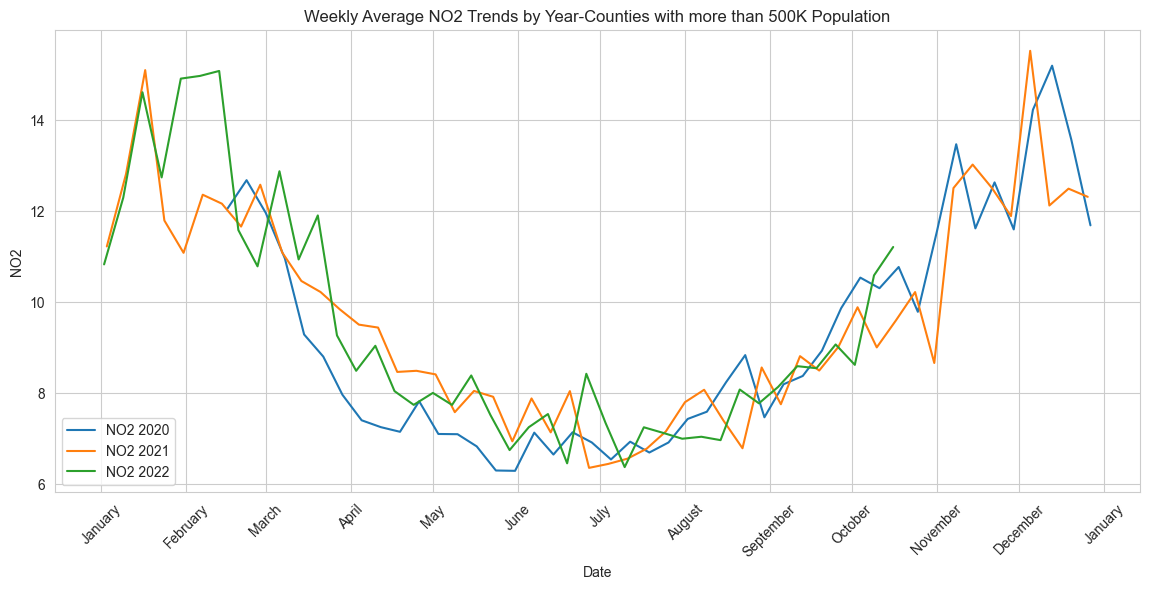

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates




# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and set its size
plt.figure(figsize=(14, 6))

# Loop through each year and plot it
for year in [2020, 2021, 2022]:
    # Select data for the year
    yearly_data = weekly_means[weekly_means.index.year == year]
    
    # Normalize dates to a common year (e.g., 2020)
    normalized_dates = pd.to_datetime(yearly_data.index.strftime('2020-%m-%d'))
    
    # Plotting
    plt.plot(normalized_dates, yearly_data['NO2'], label=f'NO2 {year}')

# Adding title and labels
plt.title('Weekly Average NO2 Trends by Year-Counties with more than 500K Population')
plt.xlabel('Date')
plt.ylabel('NO2')

# Format the x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Format as month names
# Adding a legend to distinguish between different years
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

### Mobility Visualizations:

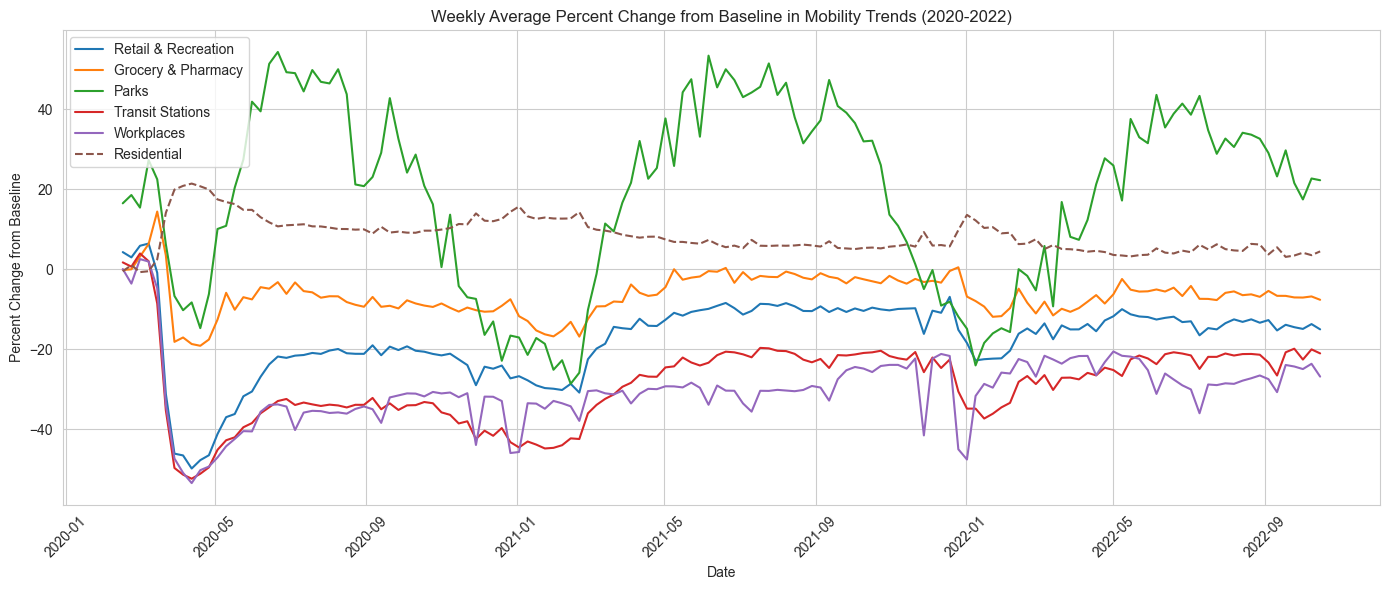

In [276]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and set its size
plt.figure(figsize=(14, 6))

# Plotting each mobility category with a unique label and line style
plt.plot(weekly_means.index, weekly_means['retail_and_recreation_percent_change_from_baseline'], label='Retail & Recreation')
plt.plot(weekly_means.index, weekly_means['grocery_and_pharmacy_percent_change_from_baseline'], label='Grocery & Pharmacy')
plt.plot(weekly_means.index, weekly_means['parks_percent_change_from_baseline'], label='Parks')
plt.plot(weekly_means.index, weekly_means['transit_stations_percent_change_from_baseline'], label='Transit Stations')
plt.plot(weekly_means.index, weekly_means['workplaces_percent_change_from_baseline'], label='Workplaces')
plt.plot(weekly_means.index, weekly_means['residential_percent_change_from_baseline'], label='Residential', linestyle='--')

# Adding title and labels
plt.title('Weekly Average Percent Change from Baseline in Mobility Trends (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')

# Adding a legend to distinguish between different lines
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()


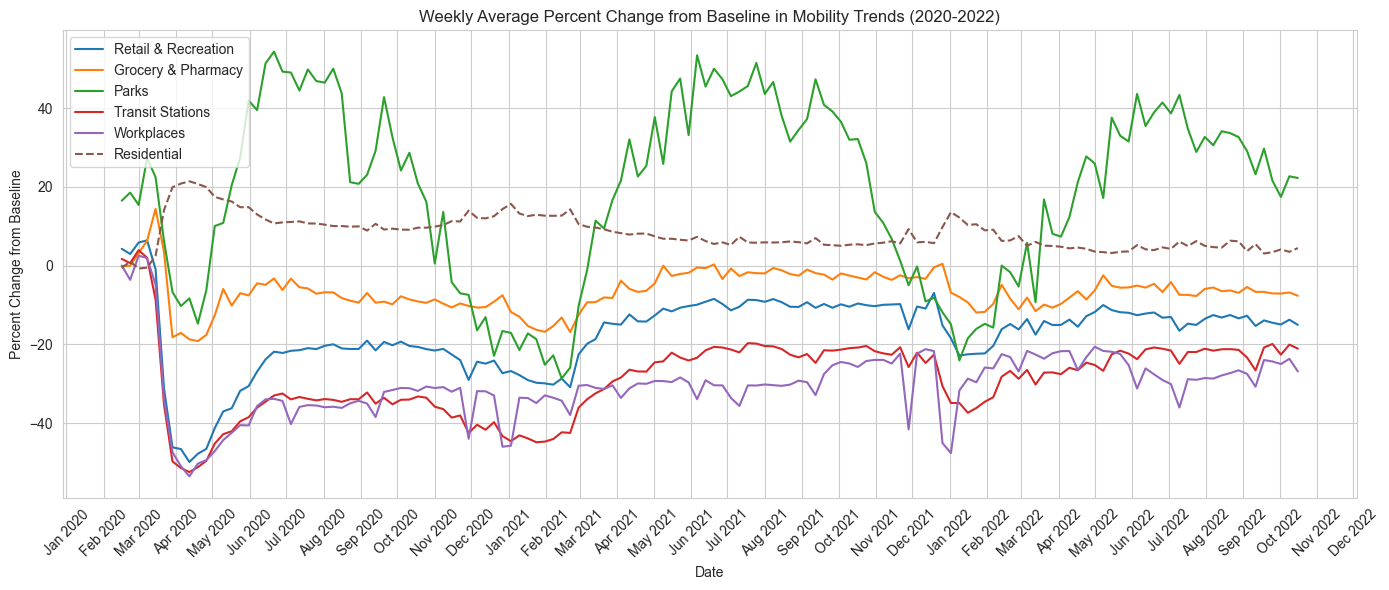

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Sample data
# Ensure `weekly_means` is a DataFrame with a datetime index and the specified columns

sns.set_style("whitegrid")

# Create a figure and set its size
plt.figure(figsize=(14, 6))

# Plotting each mobility category with a unique label and line style
plt.plot(weekly_means.index, weekly_means['retail_and_recreation_percent_change_from_baseline'], label='Retail & Recreation')
plt.plot(weekly_means.index, weekly_means['grocery_and_pharmacy_percent_change_from_baseline'], label='Grocery & Pharmacy')
plt.plot(weekly_means.index, weekly_means['parks_percent_change_from_baseline'], label='Parks')
plt.plot(weekly_means.index, weekly_means['transit_stations_percent_change_from_baseline'], label='Transit Stations')
plt.plot(weekly_means.index, weekly_means['workplaces_percent_change_from_baseline'], label='Workplaces')
plt.plot(weekly_means.index, weekly_means['residential_percent_change_from_baseline'], label='Residential', linestyle='--')

# Adding title and labels
plt.title('Weekly Average Percent Change from Baseline in Mobility Trends (2020-2022)')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')

# Adding a legend to distinguish between different lines
plt.legend()

# Setting the locator and formatter for the x-axis
locator = mdates.MonthLocator()
formatter = mdates.DateFormatter('%b %Y')

# Apply the locator and formatter to the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()


# Parks

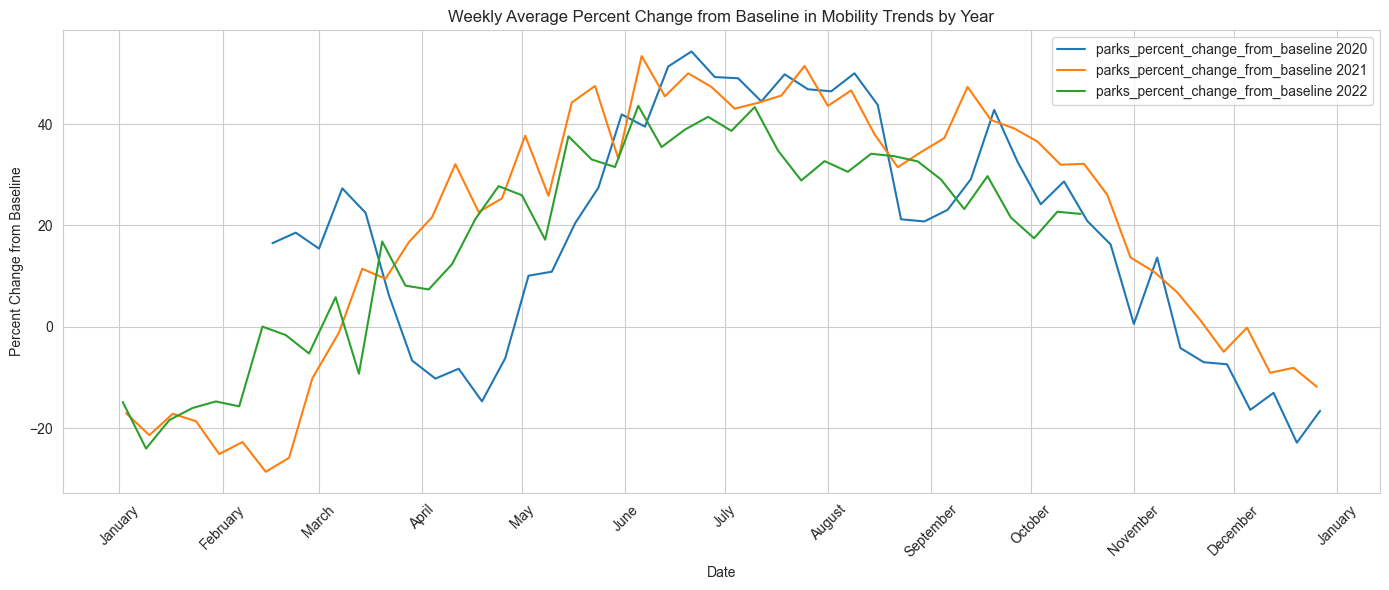

In [278]:
weekly_means.index = pd.to_datetime(weekly_means.index)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and set its size
plt.figure(figsize=(14, 6))

# Loop through each year and plot it
for year in [2020, 2021, 2022]:
    # Select data for the year
    yearly_data = weekly_means[weekly_means.index.year == year]
    
    # Normalize dates to a common year (e.g., 2020)
    normalized_dates = pd.to_datetime(yearly_data.index.strftime('2020-%m-%d'))
    
    # Plotting
    plt.plot(normalized_dates, yearly_data['parks_percent_change_from_baseline'], label=f'parks_percent_change_from_baseline {year}')

# Adding title and labels
plt.title('Weekly Average Percent Change from Baseline in Mobility Trends by Year')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')

# Format the x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Format as month names
# Adding a legend to distinguish between different years
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

# grocery_and_pharmacy_percent_change_from_baseline

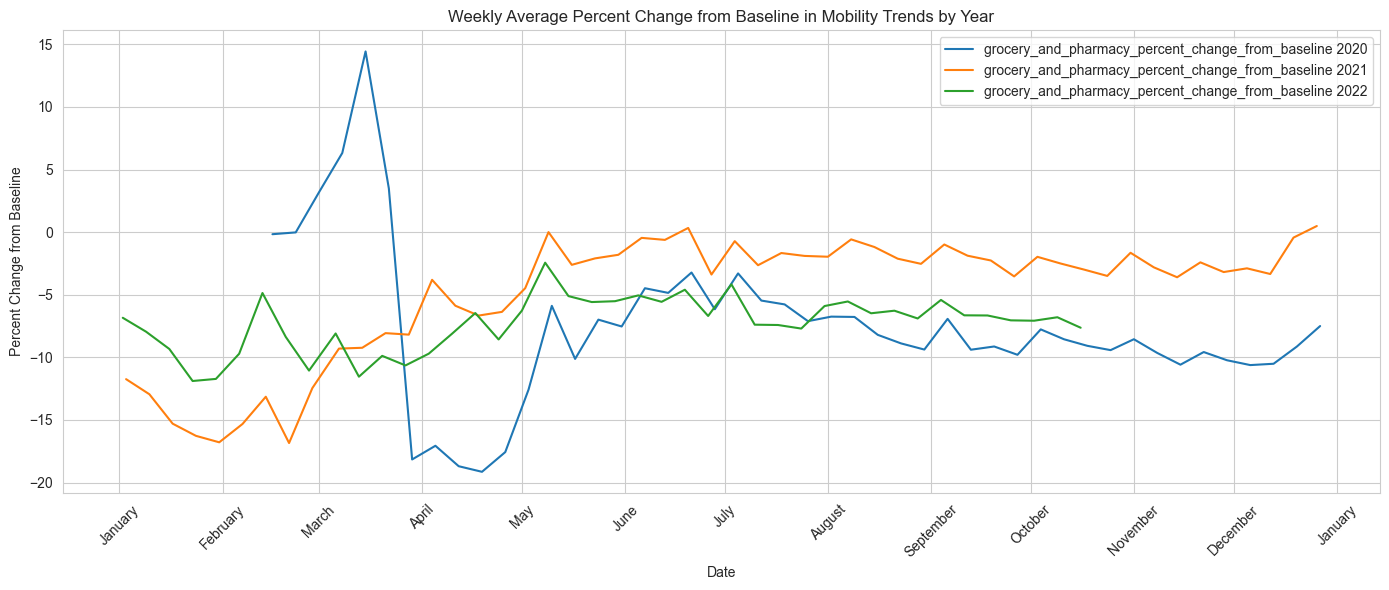

In [279]:
weekly_means.index = pd.to_datetime(weekly_means.index)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and set its size
plt.figure(figsize=(14, 6))

# Loop through each year and plot it
for year in [2020, 2021, 2022]:
    # Select data for the year
    yearly_data = weekly_means[weekly_means.index.year == year]
    
    # Normalize dates to a common year (e.g., 2020)
    normalized_dates = pd.to_datetime(yearly_data.index.strftime('2020-%m-%d'))
    
    # Plotting
    plt.plot(normalized_dates, yearly_data['grocery_and_pharmacy_percent_change_from_baseline'], label=f'grocery_and_pharmacy_percent_change_from_baseline {year}')

# Adding title and labels
plt.title('Weekly Average Percent Change from Baseline in Mobility Trends by Year')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')

# Format the x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Format as month names
# Adding a legend to distinguish between different years
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# retail_and_recreation_percent_change_from_baseline

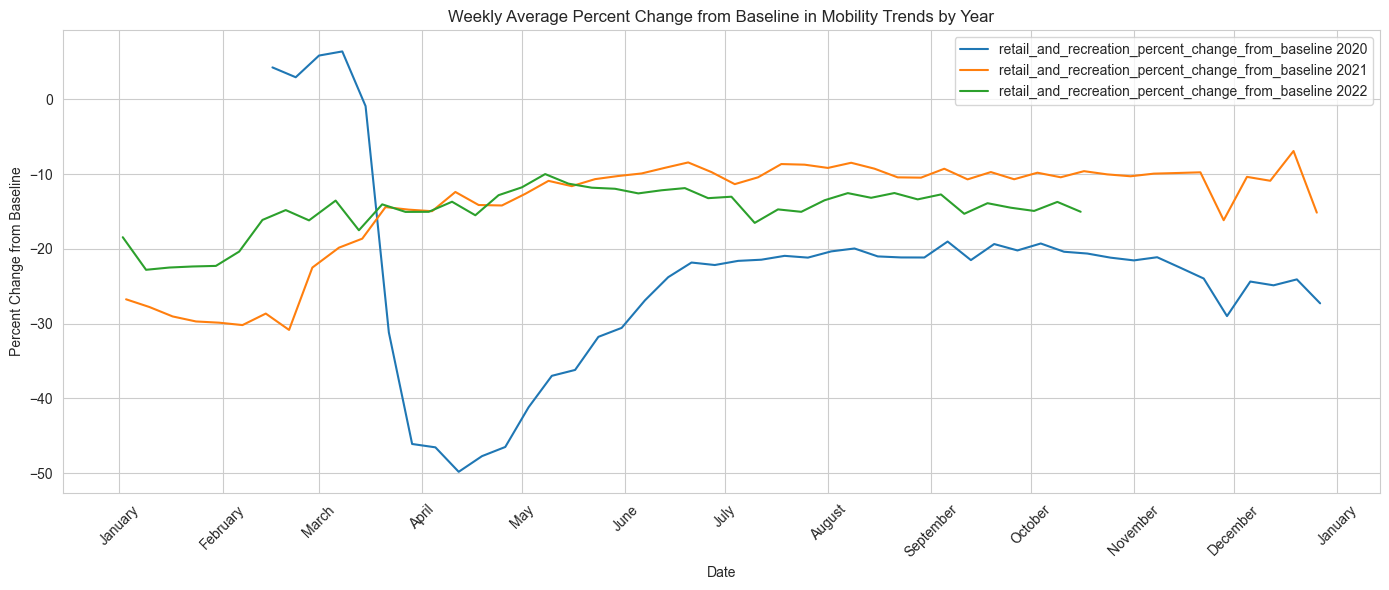

In [280]:
sns.set_style("whitegrid")

# Create a figure and set its size
plt.figure(figsize=(14, 6))

# Loop through each year and plot it
for year in [2020, 2021, 2022]:
    # Select data for the year
    yearly_data = weekly_means[weekly_means.index.year == year]
    
    # Normalize dates to a common year (e.g., 2020)
    normalized_dates = pd.to_datetime(yearly_data.index.strftime('2020-%m-%d'))
    
    # Plotting
    plt.plot(normalized_dates, yearly_data['retail_and_recreation_percent_change_from_baseline'], label=f'retail_and_recreation_percent_change_from_baseline {year}')

# Adding title and labels
plt.title('Weekly Average Percent Change from Baseline in Mobility Trends by Year')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')

# Format the x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Format as month names
# Adding a legend to distinguish between different years
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### transit_stations_percent_change_from_baseline

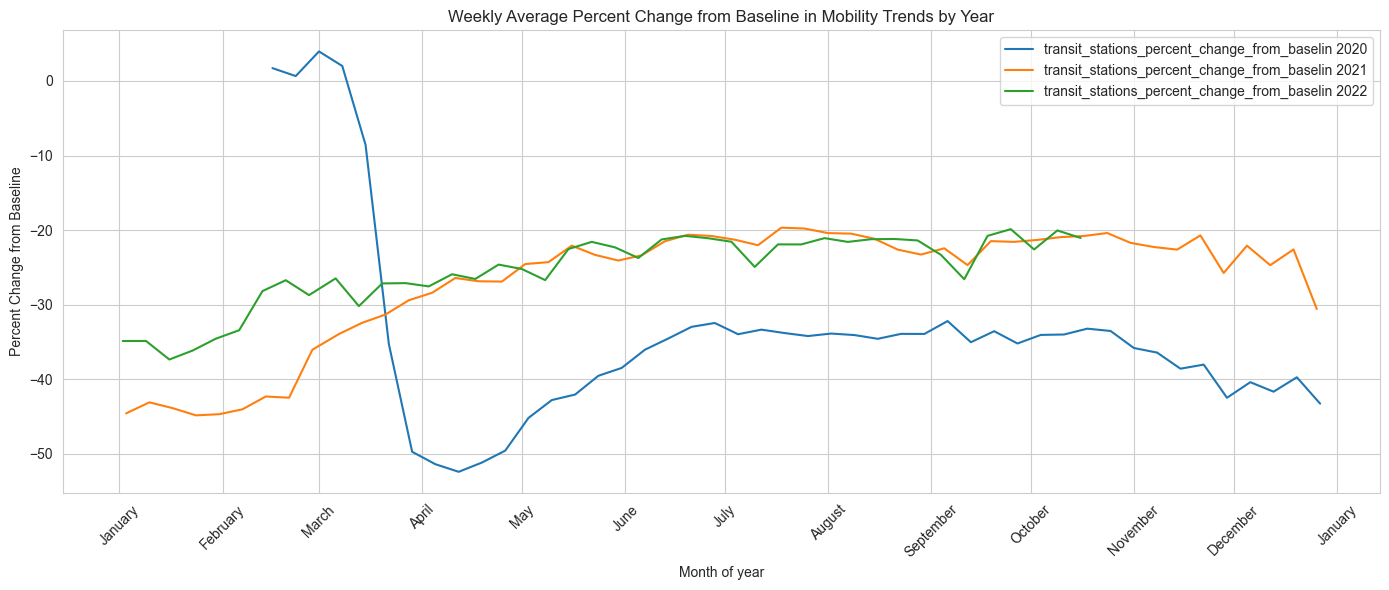

In [281]:
plt.figure(figsize=(14, 6))

# Loop through each year and plot it
for year in [2020, 2021, 2022]:
    # Select data for the year
    yearly_data = weekly_means[weekly_means.index.year == year]
    
    # Normalize dates to a common year (e.g., 2020)
    normalized_dates = pd.to_datetime(yearly_data.index.strftime('2020-%m-%d'))
    
    # Plotting
    plt.plot(normalized_dates, yearly_data['transit_stations_percent_change_from_baseline'], label=f'transit_stations_percent_change_from_baselin {year}')
    
# Adding title and labels
plt.title('Weekly Average Percent Change from Baseline in Mobility Trends by Year')
plt.xlabel('Month of year')
plt.ylabel('Percent Change from Baseline')

# Format the x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Format as month names
# Adding a legend to distinguish between different years
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()


# workplaces_percent_change_from_baseline

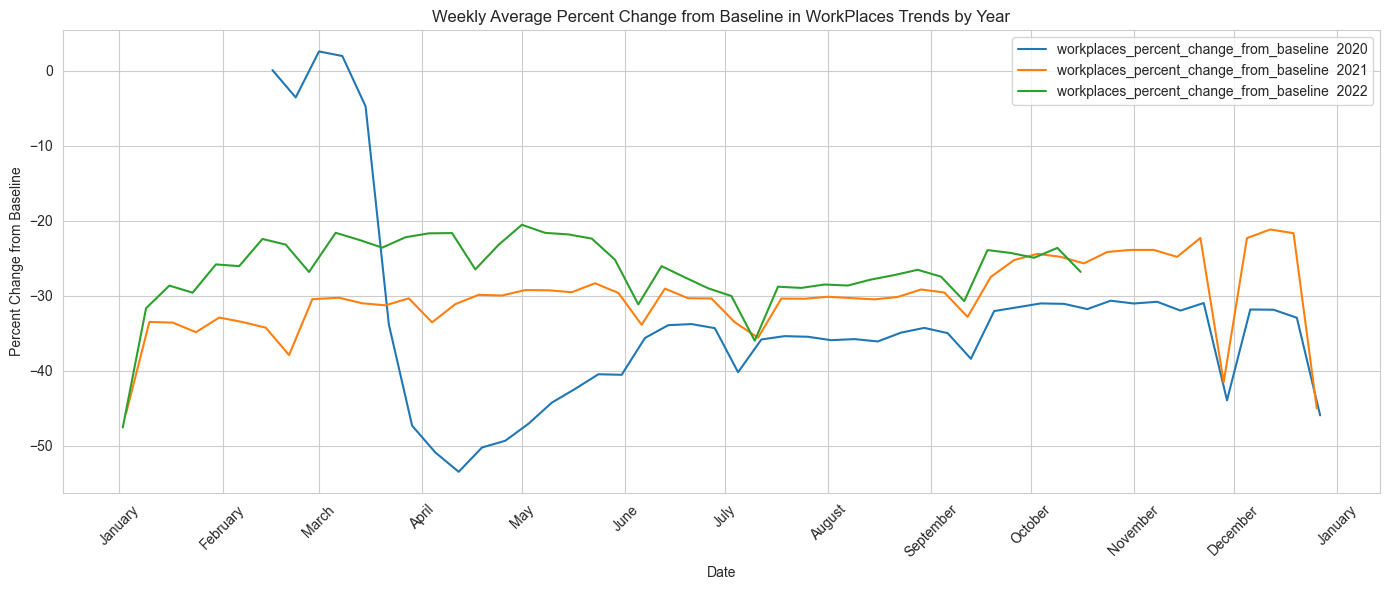

In [282]:
sns.set_style("whitegrid")

# Create a figure and set its size
plt.figure(figsize=(14, 6))

# Loop through each year and plot it
for year in [2020, 2021, 2022]:
    # Select data for the year
    yearly_data = weekly_means[weekly_means.index.year == year]

    # Normalize dates to a common year (e.g., 2020)
    normalized_dates = pd.to_datetime(yearly_data.index.strftime('2020-%m-%d'))
    
    # Plotting
    plt.plot(normalized_dates, yearly_data['workplaces_percent_change_from_baseline'], label=f'workplaces_percent_change_from_baseline  {year}')

# Adding title and labels
plt.title('Weekly Average Percent Change from Baseline in WorkPlaces Trends by Year')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')

# Format the x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Format as month names
# Adding a legend to distinguish between different years
plt.legend()
# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)
# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()


# Residential

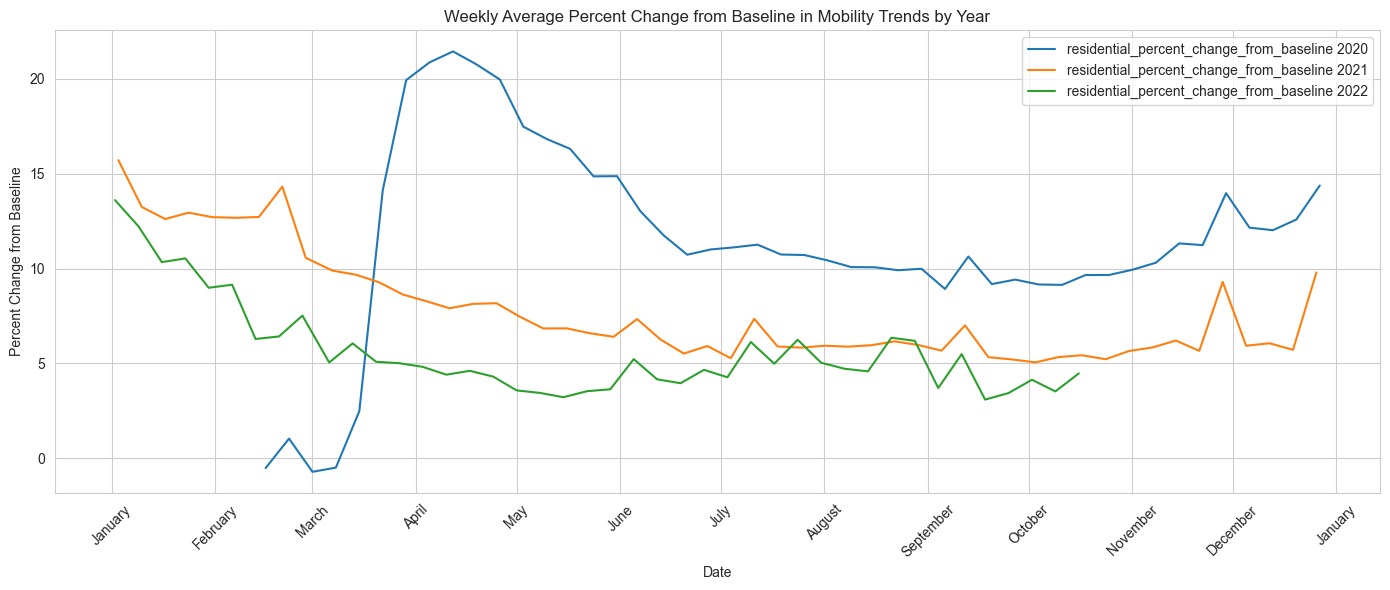

In [283]:
sns.set_style("whitegrid")
# Create a figure and set its size
plt.figure(figsize=(14, 6))

# Loop through each year and plot it
for year in [2020, 2021, 2022]:
    # Select data for the year
    yearly_data = weekly_means[weekly_means.index.year == year]
    
    # Normalize dates to a common year (e.g., 2020)
    normalized_dates = pd.to_datetime(yearly_data.index.strftime('2020-%m-%d'))
    
    # Plotting
    plt.plot(normalized_dates, yearly_data['residential_percent_change_from_baseline'], label=f'residential_percent_change_from_baseline {year}')

# Adding title and labels
plt.title('Weekly Average Percent Change from Baseline in Mobility Trends by Year')
plt.xlabel('Date')
plt.ylabel('Percent Change from Baseline')

# Format the x-axis to show month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Locate months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Format as month names
# Adding a legend to distinguish between different years
plt.legend()

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

In [284]:
df= Counties_over_500000[['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',	'parks_percent_change_from_baseline',	'transit_stations_percent_change_from_baseline' ,	'workplaces_percent_change_from_baseline',	'residential_percent_change_from_baseline','NO2']]
correlation_matrix = df.corr()
correlation_matrix

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,NO2
retail_and_recreation_percent_change_from_baseline,1.000000,0.725113,0.359440,0.456133,0.501289,-0.664760,-0.013027
grocery_and_pharmacy_percent_change_from_baseline,0.725113,1.000000,0.352948,0.376574,0.280359,-0.385575,0.001781
parks_percent_change_from_baseline,0.359440,0.352948,1.000000,0.253483,0.145670,-0.308381,-0.128058
transit_stations_percent_change_from_baseline,0.456133,0.376574,0.253483,1.000000,0.371446,-0.451681,-0.039290
workplaces_percent_change_from_baseline,0.501289,0.280359,0.145670,0.371446,1.000000,-0.856340,-0.054900
residential_percent_change_from_baseline,-0.664760,-0.385575,-0.308381,-0.451681,-0.856340,1.000000,0.080598
NO2,-0.013027,0.001781,-0.128058,-0.039290,-0.054900,0.080598,1.000000


In [285]:

df = Counties_over_500000[['NO2','retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',	'parks_percent_change_from_baseline',	'transit_stations_percent_change_from_baseline' ,	'workplaces_percent_change_from_baseline',	'residential_percent_change_from_baseline' ]].resample('D').mean()
df
df.reset_index(inplace=True)
df['Date Local'] = pd.to_datetime(df['Date Local'])

### 2020 csv file data, mid march to mid april

In [286]:

start_date = '2020-03-15'
end_date = '2020-04-15'

df_1 = df[(df['Date Local'] >=start_date ) & (df['Date Local'] <= end_date)]


df_1['Day_of_Week'] = df_1['Date Local'].dt.dayofweek
df_1.to_csv('Counties_over_500000_2020_march_april.csv')

C:\Users\habib\AppData\Local\Temp\ipykernel_57160\2842632784.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Day_of_Week'] = df_1['Date Local'].dt.dayofweek


### 2021 csv file data, mid march to mid april

In [290]:

start_date = '2021-03-15'
end_date = '2021-04-15'

df_2 = df[(df['Date Local'] >=start_date ) & (df['Date Local'] <= end_date)]
df_2.reset_index(inplace=True)

df_2['Day_of_Week'] = df_2['Date Local'].dt.dayofweek
df_2.to_csv('Counties_over_500000_2021_march_april.csv')

C:\Users\habib\AppData\Local\Temp\ipykernel_57160\2784464968.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Day_of_Week'] = df_2['Date Local'].dt.dayofweek


### 2022 csv file data, mid march to mid april

In [291]:

start_date = '2022-03-15'
end_date = '2022-04-15'

df_3 = df[(df['Date Local'] >=start_date ) & (df['Date Local'] <= end_date)]
df_3.reset_index(inplace=True)

df_3['Day_of_Week'] = df_3['Date Local'].dt.dayofweek
df_3.to_csv('Counties_over_500000_2022_march_april.csv')

C:\Users\habib\AppData\Local\Temp\ipykernel_57160\581280227.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['Day_of_Week'] = df_3['Date Local'].dt.dayofweek
